In [7]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from misc.read_nyu import load_color_image, load_depth_image
from tools.depth_conversion import depth_rel_to_depth_abs

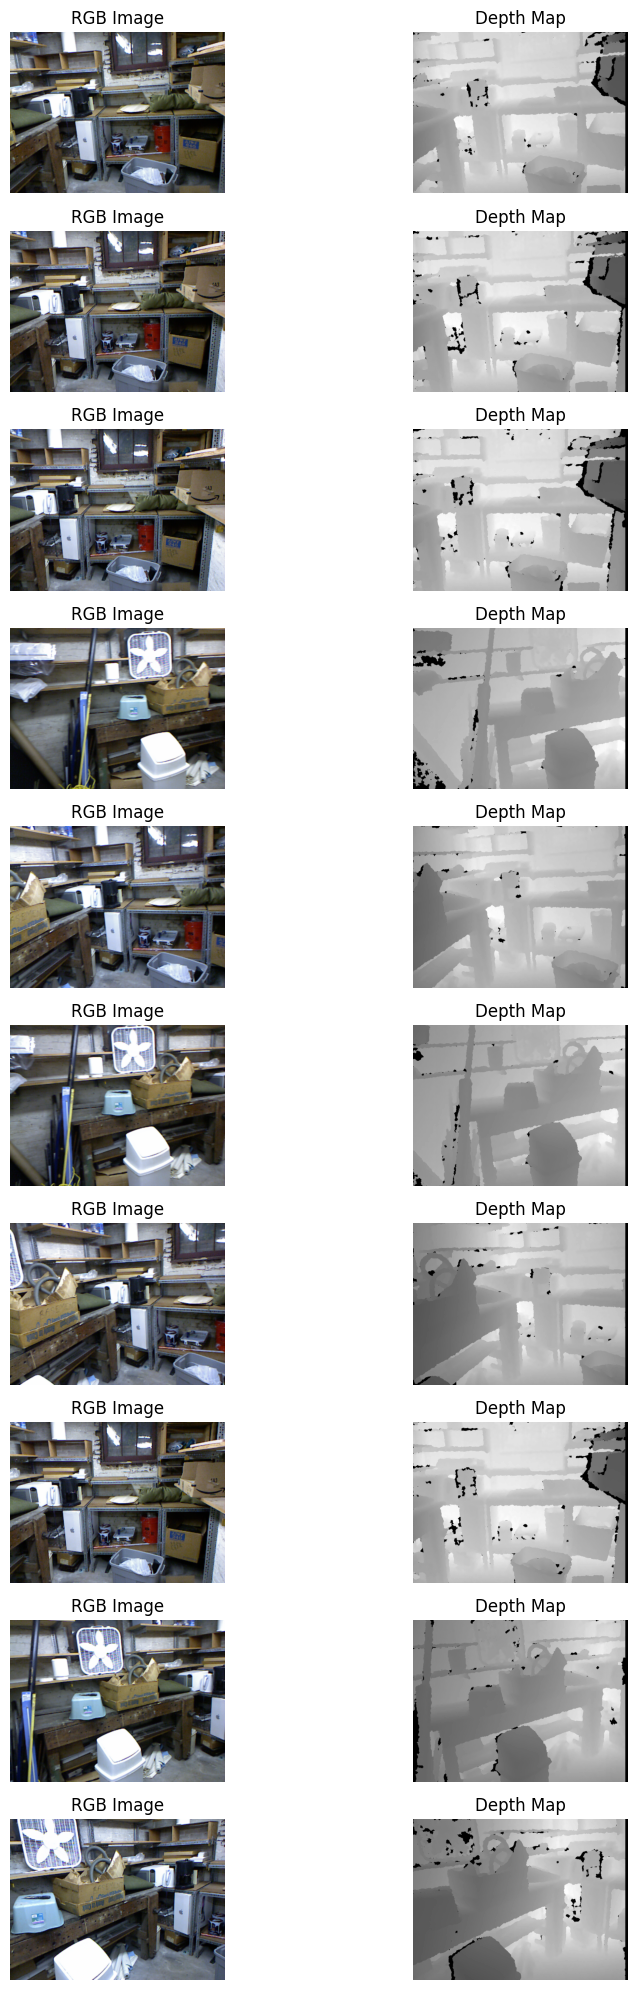

In [11]:
file_name = 'basement.txt'
base_path = 'data'
num_images = 10

with open(file_name, 'r') as file:
    records = file.readlines()

random.shuffle(records)
selected_records = records[:num_images]

# Creazione della griglia di immagini
fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(10, 20))

# Visualizzazione delle immagini
for i, record in enumerate(selected_records):
    depth_path, rgb_path, _, _ = record.split()

    rgb_image = load_color_image(path=os.path.join(base_path, rgb_path))
    depth_image = load_depth_image(path=os.path.join(base_path, depth_path))

    #rgb_image.show()
    depth = depth_rel_to_depth_abs(np.asarray(depth_image, dtype=np.float32))

    # Visualizzazione dell'immagine RGB
    axes[i][0].imshow(rgb_image)
    axes[i][0].set_axis_off()
    axes[i][0].set_title('RGB Image')

    # Visualizzazione dell'immagine depth map
    axes[i][1].imshow(depth, cmap='gray')
    axes[i][1].set_axis_off()
    axes[i][1].set_title('Depth Map')

plt.tight_layout()
plt.show()